In [1]:
!nvidia-smi

Thu Mar 31 17:44:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:07:00.0  On |                  N/A |
|  0%   49C    P8    17W / 170W |    761MiB / 12288MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# dump gpu memory
#torch.cuda.empty_cache()

In [1]:
z_dim = 128
n_classes = 1000

import matplotlib.pyplot as plt
import numpy as np

import os 
import sys

sys.path.insert(1, os.path.join(sys.path[0], '..'))

# download stuff for one hot encoding of y categories

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# load big gan model

import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample, display_in_terminal)
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load pre-trained model tokenizer (vocabulary)
model = BigGAN.from_pretrained('../pretrained/biggan-deep-512')#model.to('cuda')
model.to('cuda')

# utils

# interpolation funcs
def interpolate_linear(v1, v2, num_steps):
  vectors = []
  for x in np.linspace(0.0, 1.0, num_steps):
    vectors.append(v2*x+v1*(1-x))  
  return np.array(vectors)

def interpolate_hypersphere(v1, v2, num_steps):
  v1_norm = np.linalg.norm(v1)
  v2_norm = np.linalg.norm(v2)
  v2_normalized = v2 * (v1_norm / v2_norm)

  vectors = []
  for step in range(num_steps):
    interpolated = v1 + (v2_normalized - v1) * step / (num_steps - 1)
    interpolated_norm =  np.linalg.norm(interpolated)
    interpolated_normalized = interpolated * (v1_norm / interpolated_norm)
    vectors.append(interpolated_normalized)
  return np.array(vectors)

# im funcs
def convert_to_images(obj):
    """ Convert an output tensor from BigGAN in a list of images.
        Params:
            obj: tensor or numpy array of shape (batch_size, channels, height, width)
        Output:
            list of Pillow Images of size (height, width)
    """
    try:
        from PIL import Image
    except ImportError:
        raise ImportError("Please install Pillow to use images: pip install Pillow")

    if not isinstance(obj, np.ndarray):
        obj = obj.cpu().detach().numpy()

    obj = obj.transpose((0, 2, 3, 1))
    obj = np.clip(((obj + 1) / 2.0) * 256, 0, 255)

    img = []
    for i, out in enumerate(obj):
        out_array = np.asarray(np.uint8(out), dtype=np.uint8)
        img.append(Image.fromarray(out_array))
    return img

def save_as_images(obj, file_name='output'):
    """ Convert and save an output tensor from BigGAN in a list of saved images.
        Params:
            obj: tensor or numpy array of shape (batch_size, channels, height, width)
            file_name: path and beggingin of filename to save.
                Images will be saved as `file_name_{image_number}.png`
    """
    img = convert_to_images(obj)

    for i, out in enumerate(img):
        current_file_name = file_name + '_%d.png' % i
        logger.info("Saving image to {}".format(current_file_name))
        out.save(current_file_name, 'png')

def save_as_batch_images(obj, file_name='output', batch_i=0):
    img = convert_to_images(obj)

    for i, out in enumerate(img):
        path = os.path.join(file_name, "{}.png".format(str(batch_i+i)))
        #current_file_name = file_name + '%d.png' % (batch_i + i)
        logger.info("Saving image to {}".format(path))
        out.save(path, 'png')



[nltk_data] Downloading package wordnet to /home/ms/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ms/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
INFO:pytorch_pretrained_biggan.model:loading model ../pretrained/biggan-deep-512 from cache at ../pretrained/biggan-deep-512/pytorch_model.bin
INFO:pytorch_pretrained_biggan.model:Model config {
  "attention_layer_position": 8,
  "channel_width": 128,
  "class_embed_dim": 128,
  "eps": 0.0001,
  "layers": [
    [
      false,
      16,
      16
    ],
    [
      true,
      16,
      16
    ],
    [
      false,
      16,
      16
    ],
    [
      true,
      16,
      8
    ],
    [
      false,
      8,
      8
    ],
    [
      true,
      8,
      8
    ],
    [
      false,
      8,
      8
    ],
    [
      true,
      8,
      4
    ],
    [
      false,
      4,
      4
    ],
    [
      true,
      4,
      2
    ],
    [
      false,
    

In [ ]:
# basic image generation

# Prepare a input
# truncation = 0.4
# class_vector = one_hot_from_names(['Blenheim spaniel'], batch_size=5)
# noise_vector = truncated_noise_sample(truncation=truncation, batch_size=5, seed=50)

# # All in tensors
# noise_vector = torch.from_numpy(noise_vector)
# class_vector = torch.from_numpy(class_vector)

# # If you have a GPU, put everything on cuda
# noise_vector = noise_vector.to('cuda')
# class_vector = class_vector.to('cuda')
# noise_vector.shape

# # Generate an image
# with torch.no_grad():
#     output = model(noise_vector, class_vector, truncation)

In [ ]:
# visualize z sample

dim_z = 128
y = np.linspace(0, dim_z, dim_z)
truncation = 1.
z = truncated_noise_sample(truncation=truncation, batch_size=1, seed=50)
plt.scatter(y,z)
plt.show()

In [ ]:
# If you have a GPU put back on CPU
#output = output.to('cpu')

# If you have a sixtel compatible terminal you can display the images in the terminal
# (see https://github.com/saitoha/libsixel for details)
#display_in_terminal(output)

# Save results as png images
#save_as_images(output)

In [ ]:
# prepare interpolation data 
num_interps = 20 
truncation = 0.3

y_v1 = one_hot_from_names(['rhinoceros beetle'], batch_size=1)
y_v2 = one_hot_from_names(['roundabout'], batch_size=1)

z_v1 = truncated_noise_sample(truncation=truncation, batch_size=1, seed=3213)
z_v2 = truncated_noise_sample(truncation=truncation, batch_size=1, seed=1)

#create interpolation for both the category and the z vector 
interps_z = interpolate_hypersphere(z_v1 , z_v2 , num_interps)
interps_y = interpolate_hypersphere(y_v1,  y_v2, num_interps)

interps_z = interps_z.reshape(num_interps, z_dim)
interps_y = interps_y.reshape(num_interps, n_classes)

interps_z = torch.from_numpy(interps_z)
interps_y = torch.from_numpy(interps_y)

interps_z = interps_z.to('cuda')
interps_y = interps_y.to('cuda')

In [ ]:
# generated interpolated images
with torch.no_grad():
    output = model(interps_z, interps_y, truncation)
    save_as_images(output)

In [ ]:
# preserve background

#In this expermient we try to change the background of an arbitrary image 
#while keeping the foreground the same. We want the foregournd image to stay stable 
#so we need a function that preserves the values near zero but at the same time change the values away from zero.

# vals near 0 = background features?
# vals away from 0 = foreground features?

truncation = 0.7

y = one_hot_from_names(['tiger beetle'], batch_size=2)

z = np.zeros((2,128))
z_tmp = truncated_noise_sample(truncation=truncation, batch_size=1, seed=123)
z[0] = z_tmp[0]
# use sin func to modify values, values close to 0 stay close to 0, values away from 0 will be changed
z[1] = np.sin(z_tmp[0])
z = z.astype(np.float32)

y = torch.from_numpy(y)
z = torch.from_numpy(z)

y = y.to('cuda')
z = z.to('cuda')

with torch.no_grad():
   output = model(z, y, truncation)
   save_as_images(output)



In [ ]:
# zooming

# We try to zoom into a certain category to see the details of the generated images. 
# In order to that we need increase the weights of the vectors. 
# This doesn't work unless each feature in the vector space has either the value 1 or -1. 
# This is done by dividing each value in the vector by its absolute value namely $z/|z|$. 
# Then we can provide scaling by multipling by increasing negative values. 
# Note that this is highly dependent on the seed we are choosing. 
# Here we choose the seed = 2. 

torch.cuda.empty_cache()

truncation = .7

z_start = truncated_noise_sample(truncation=truncation, batch_size=1, seed=5432)

zoom_steps = 5
step_size = 0.2

y = one_hot_from_names(['tiger beetle'], batch_size=zoom_steps)

steps = np.arange(step_size,(zoom_steps*step_size)+step_size,step_size)
print(steps)
z = [-step*(z_start/np.abs(z_start)) for step in steps]
z = np.array(z).reshape(zoom_steps, z_dim)

y = torch.from_numpy(y)
z = torch.from_numpy(z)

y = y.to('cuda')
z = z.to('cuda')

In [ ]:
with torch.no_grad():
   output = model(z, y, truncation)
   save_as_images(output)

In [ ]:
# breeding

# The idea is simple we just average the incoded labels and use the same seed vector. We use the combination 
# y^=ay1+(1−a)y2
torch.cuda.empty_cache()

truncation = 1.
a = 0.2

z = truncated_noise_sample(truncation=truncation, batch_size=1, seed=1)
y1 = one_hot_from_names(['albatross'], batch_size=1)
y2 = one_hot_from_names(['pelican'], batch_size=1)
y3 = a*y1+(1-a)*y2

z = np.array([z,z,z]).reshape(3, 128)
y = np.array([y1,y2,y3]).reshape(3, 1000)

y = torch.from_numpy(y)
z = torch.from_numpy(z)

y = y.to('cuda')
z = z.to('cuda')

In [ ]:
with torch.no_grad():
   output = model(z, y, truncation)
   save_as_images(output)

In [ ]:
# create samples accross N classes from a single latent vector

torch.cuda.empty_cache()

n_images = 500 # N
truncation = 0.3

# one hot encode y
y = np.zeros((n_images, n_classes), dtype=np.float32)
for i in range(n_images):
    for j in range(n_classes):
        y[i, i] = 1.0
        
# get single latent vector
z = truncated_noise_sample(truncation=truncation, batch_size=1, seed=3213)
# clone it N times
z = np.tile(z,(n_images,1))

y = torch.from_numpy(y)
z = torch.from_numpy(z)

y = y.to('cuda')
z = z.to('cuda')

In [ ]:
batch_size = 10

with torch.no_grad():
   for b in range(int(n_images/batch_size)):
       start = b*batch_size
       end = start + batch_size
       z_ = z[start:end, :]
       y_ =  y[start:end, :]
       results = model(z_, y_, truncation)
       batch_idx = b*batch_size
       save_as_batch_images(results, "./outputs/test2/", batch_i=batch_idx)

In [ ]:
# create samples from a single latent vector with altering elements

torch.cuda.empty_cache()

truncation = 0.3
n_samples = 10

y = one_hot_from_names(['soap bubble'], batch_size=1)
y = np.tile(y,(n_samples,1))
        
# get single latent vector 
z = truncated_noise_sample(truncation=truncation, batch_size=1, seed=3213)
# clone it N times
z = np.tile(z,(n_samples,1))

# set 1 elemet of each latent vec copy to 0
lfunc = lambda x: 1.5 if x < 0 else x
lfunc = np.vectorize(lfunc)

for idx in range(n_samples):
    z[idx] = lfunc(z[idx])
    
print(z.shape)
y = torch.from_numpy(y)
z = torch.from_numpy(z)

y = y.to('cuda')
z = z.to('cuda')

batch_size = 2
with torch.no_grad():
   for b in range(int(n_samples/batch_size)):
       start = b*batch_size
       end = start + batch_size
       z_ = z[start:end, :]
       y_ =  y[start:end, :]
       results = model(z_, y_, truncation)
       batch_idx = b*batch_size
       save_as_batch_images(results, "./outputs/test3/", batch_i=batch_idx)

In [ ]:
from scipy.stats import truncnorm
import json

def truncated_noise_sample_(batch_size=1, minz=-2, maxz=2, dim_z=128, truncation=1., seed=None):
    state = None if seed is None else np.random.RandomState(seed)
    values = truncnorm.rvs(minz, maxz, size=(batch_size, dim_z), random_state=state).astype(np.float32)
    return truncation * values

n_samples = 20
minz=-1.
maxz= 0.
zdim=128
truncation=1.0
parent_dir = "./outputs/"
out_dir = "data_batch"
out_path = os.path.join(parent_dir, out_dir)

# create output dirs

if not os.path.isdir(out_path):
    os.mkdir(out_path)
    print("dir created at '{}' ".format(out_path))

im_path = os.path.join(out_path, "images")
if not os.path.isdir(im_path):
    os.mkdir(im_path)
    print("images dir created at '{}' ".format(im_path))

# generate z and y
    
z = truncated_noise_sample_(n_samples, minz, maxz, zdim, truncation)
y = one_hot_from_names(['soap bubble'], batch_size=n_samples)

# generate images

y_torch = torch.from_numpy(y)
z_torch = torch.from_numpy(z)

y_torch = y_torch.to('cuda')
z_torch = z_torch.to('cuda')

torch.cuda.empty_cache() # free up vram
predict_batch_size = 5 # generate images in batches to avoid running out of vram
with torch.no_grad():
    for b in range(int(n_samples/predict_batch_size)):
        start = b*predict_batch_size
        end = start + predict_batch_size
        z_ = z_torch[start:end, :]
        y_ =  y_torch[start:end, :]
        results = model(z_, y_, truncation)
        batch_idx = b*predict_batch_size
        save_as_batch_images(results, im_path, batch_i=batch_idx)  

# reduce z vecs to 2d
import umap
n_neighbours = 2 # umap neighbours 
z_reducer = umap.UMAP(n_neighbors=n_neighbours, min_dist=0.1, n_components=2)
z_2d_embeddings = z_reducer.fit_transform(z)


# prepare data
img_data = []
for idx, (emb, vec) in enumerate(zip(z_2d_embeddings, z)):
    d = {"img_idx": str(idx),
         "z_2d": emb.tolist(),
         "z": vec.tolist()}
    img_data.append(d)

# prepare metadata
max_2d_x = z_2d_embeddings[:, 0].max()
min_2d_x = z_2d_embeddings[:, 0].min()
max_2d_y = z_2d_embeddings[:, 1].max()
min_2d_y = z_2d_embeddings[:, 1].min()
meta = { "bounding_box_2d": 
            {"x1": str(min_2d_x), 
             "y1": str(min_2d_y), 
             "x2": str(max_2d_x), 
             "y2": str(max_2d_y)},
         "img_format": "png"}

# export
data = {"meta" : meta,
        "data" : img_data}
    
out_path = os.path.join(out_path, 'data.json')
with open(out_path, 'w') as out_file:
    json.dump(data, out_file)    


# y = torch.from_numpy(y)
# z = torch.from_numpy(z)

# y = y.to('cuda')
# z = z.to('cuda')

# predict_batch_size = 10

# with torch.no_grad():
#    for b in range(int(n_samples/predict_batch_size)):
#        start = b*predict_batch_size
#        end = start + predict_batch_size
#        z_ = z[start:end, :]
#        y_ =  y[start:end, :]
#        results = model(z_, y_, truncation)
#        batch_idx = b*predict_batch_size
#        save_as_batch_images(results, path, batch_i=batch_idx)    

In [12]:
# generate multiple batches of images with the same Z and alternating Y

from scipy.stats import truncnorm
import json

def truncated_noise_sample_(batch_size=1, minz=-2, maxz=2, dim_z=128, truncation=1., seed=None):
    state = None if seed is None else np.random.RandomState(seed)
    values = truncnorm.rvs(minz, maxz, size=(batch_size, dim_z), random_state=state).astype(np.float32)
    return truncation * values

total_classes = 1000
n_samples = 30
minz=-1.
maxz= 0.
zdim=128
truncation=1.0
parent_dir = "./outputs/"
out_dir = "data_batch1"
classes = ['soap bubble', 'magpie', 'broom']
n_classes = len(classes)

# create output dirs

# main dir
out_path = os.path.join(parent_dir, out_dir)
if not os.path.isdir(out_path):
    os.mkdir(out_path)
    print("dir created at '{}' ".format(out_path))    

# images dir
images_path = os.path.join(out_path, "images")
if not os.path.isdir(images_path):
    os.mkdir(images_path)
    print("im dir created at '{}' ".format(images_path))    

# sub dirs for each class
images_subpaths = [] # save paths for export
for c in classes:
    c = c.replace(" ", "_")
    im_path = os.path.join(images_path, c)
    images_subpaths.append(im_path)
    if not os.path.isdir(im_path):
        os.mkdir(im_path)
        print("images dir created at '{}' ".format(im_path))

# generate z and y
    
z = truncated_noise_sample_(n_samples, minz, maxz, zdim, truncation)
z = np.tile(z,(n_classes, 1, 1))

y_tmp = one_hot_from_names(['soap bubble', 'magpie', 'broom'], batch_size=n_classes)

# copy one hot encoded y for each sample to be generated
# from (3, 1000) 
# to (3, 20, 1000)
y = np.zeros((n_classes, n_samples, total_classes))
for i in range(n_classes):
      y[i] = np.tile(y_tmp[i],(n_samples,1))

# convert numpy to torch arrays
y_torch = torch.from_numpy(y).float()
z_torch = torch.from_numpy(z)

y_torch = y_torch.to('cuda')
z_torch = z_torch.to('cuda')

torch.cuda.empty_cache() # free up vram

predict_batch_size = 5 # generate images in batches to avoid running out of vram

# generate images
with torch.no_grad():
   for i in range(n_classes):
        im_path = images_subpaths[i]
        for b in range(int(n_samples/predict_batch_size)):
            start = b*predict_batch_size
            end = start + predict_batch_size
            z_ = z_torch[i, start:end, :]
            y_ =  y_torch[i, start:end, :]
            results = model(z_, y_, truncation)
            batch_idx = b*predict_batch_size
            save_as_batch_images(results, im_path, batch_i=batch_idx)  

# reduce z vecs to 2d
import umap
n_neighbours = 5 # umap neighbours 
z_reducer = umap.UMAP(n_neighbors=n_neighbours, min_dist=0.1, n_components=2)
z_2d_embeddings = z_reducer.fit_transform(z[0]) # !!! z[0] WILL ONLY REDUCE THE 1st GENERATION !!!

# prepare data
img_data = []

for c in classes:
    c = c.replace(" ", "_")
    d = {"label" : c}
    points = []
    for idx, (emb, vec) in enumerate(zip(z_2d_embeddings, z[0])): # !!! z[0] WILL INCLUDE ONLY THE 1st GENERATION !!!
        p = {"img_name": str(idx), "z_2d": emb.tolist()
             #"z": vec.tolist() # uncomment this to also store Z
            }
        points.append(p)
    d["data"] = points
    img_data.append(d)

# prepare metadata
max_2d_x = z_2d_embeddings[:, 0].max()
min_2d_x = z_2d_embeddings[:, 0].min()
max_2d_y = z_2d_embeddings[:, 1].max()
min_2d_y = z_2d_embeddings[:, 1].min()
meta = { "bounding_box_2d": 
            {"x1": str(min_2d_x), 
             "y1": str(min_2d_y), 
             "x2": str(max_2d_x), 
             "y2": str(max_2d_y)},
         "img_format": "png"}

# export
data = {"meta" : meta,
        "data" : img_data}
    
out_path = os.path.join(out_path, 'data.json')
with open(out_path, 'w') as out_file:
    json.dump(data, out_file)    

INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/0.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/1.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/2.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/3.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/4.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/5.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/6.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/7.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/8.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/9.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/10.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/11.png
INFO:__main__:Saving image to ./outputs/data_batch1/images/soap_bubble/12.

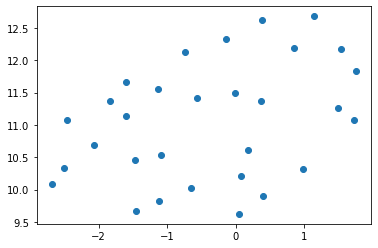

In [16]:
x = z_2d_embeddings[:, [0]]
y = z_2d_embeddings[:, [1]]
plt.scatter(x, y)